In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./../data/raw/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

# Quality dataset analysis.

First aproach to asses its quality.

In [3]:
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [4]:
data.shape

(1925, 231)

In [5]:
data.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Number of rows with null values

In [6]:
data.isnull().any(axis=1).sum()

1380

Perentage of empty values

In [7]:
(data.isnull().sum().sum()/np.product(data.shape)) * 100

50.34305953786473

In [8]:
data.isnull().all(axis=1).sum()

0

# Exploratory Data Analysis:

<AxesSubplot:xlabel='ICU', ylabel='count'>

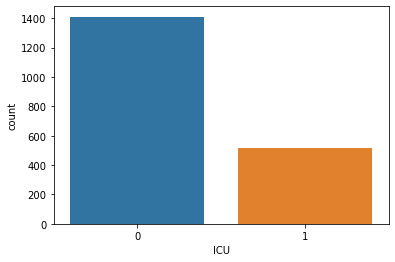

In [9]:
sns.countplot(data=data, x='ICU')

<AxesSubplot:xlabel='WINDOW', ylabel='count'>

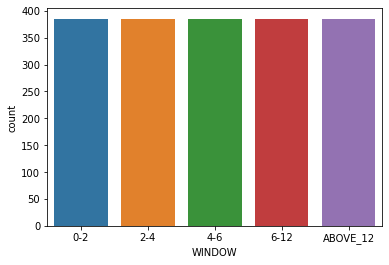

In [10]:
sns.countplot(data=data, x=data['WINDOW'])

<AxesSubplot:xlabel='WINDOW', ylabel='count'>

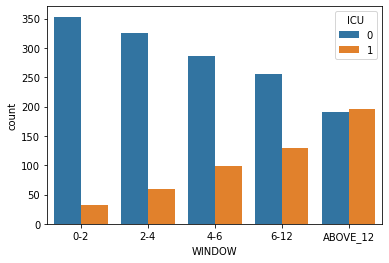

In [11]:
sns.countplot(x="WINDOW", hue="ICU", data=data)

<AxesSubplot:xlabel='AGE_ABOVE65', ylabel='count'>

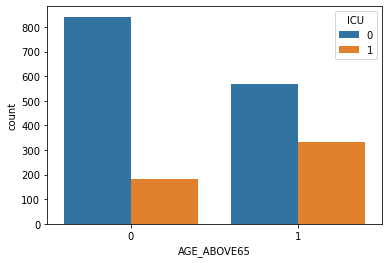

In [12]:
sns.countplot(x='AGE_ABOVE65', hue='ICU', data=data)

<AxesSubplot:xlabel='AGE_PERCENTIL', ylabel='count'>

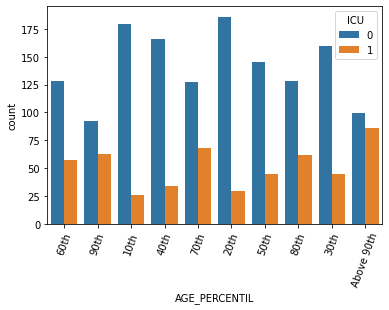

In [13]:
plt.xticks(rotation=70)
sns.countplot(x="AGE_PERCENTIL", hue="ICU", data=data)

<AxesSubplot:xlabel='IMMUNOCOMPROMISED', ylabel='count'>

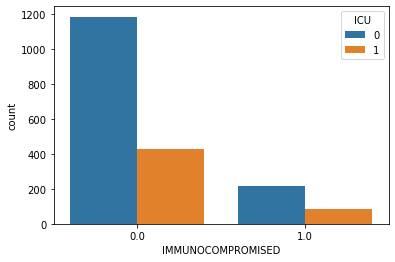

In [14]:
sns.countplot(x="IMMUNOCOMPROMISED", hue="ICU", data=data)

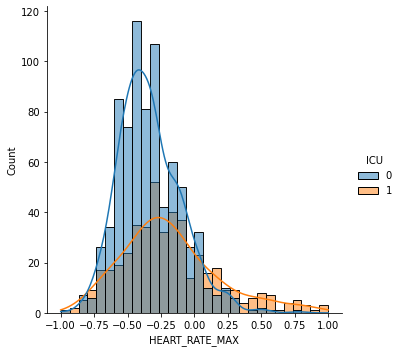

In [15]:
sns.displot(x='HEART_RATE_MAX', hue='ICU', data=data, kde=True)

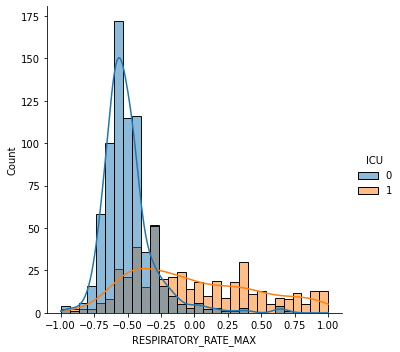

In [16]:
sns.displot(x='RESPIRATORY_RATE_MAX', hue='ICU', data=data, kde=True)

<AxesSubplot:xlabel='HEART_RATE_MAX', ylabel='RESPIRATORY_RATE_MAX'>

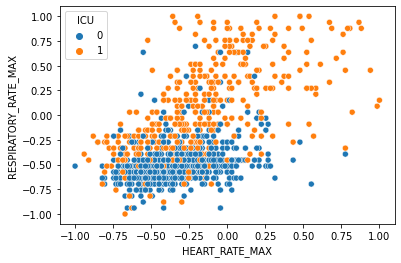

In [17]:
sns.scatterplot(x='HEART_RATE_MAX', y='RESPIRATORY_RATE_MAX', hue='ICU', data=data)

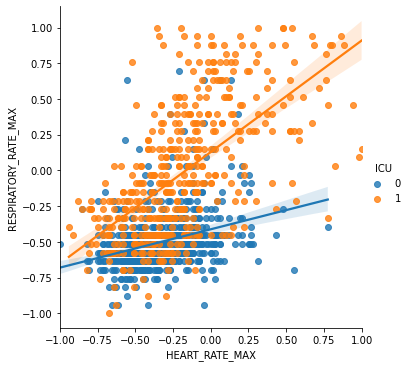

In [23]:
sns.lmplot(x='HEART_RATE_MAX', y='RESPIRATORY_RATE_MAX', hue='ICU', data=data);

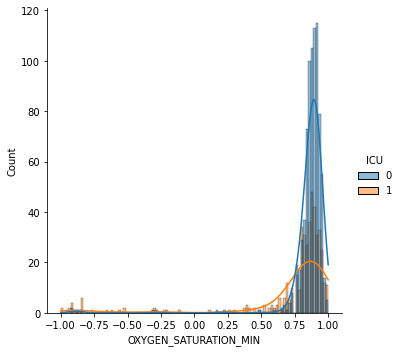

In [18]:
sns.displot(data=data, x="OXYGEN_SATURATION_MIN", hue='ICU', kde=True)

<AxesSubplot:xlabel='OXYGEN_SATURATION_MIN', ylabel='RESPIRATORY_RATE_MAX'>

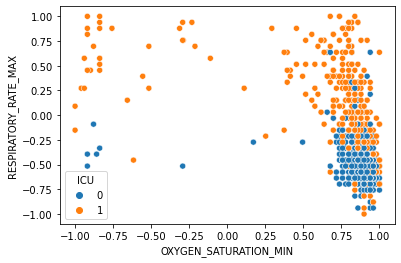

In [19]:
sns.scatterplot(x='OXYGEN_SATURATION_MIN', y='RESPIRATORY_RATE_MAX', hue='ICU', data=data)

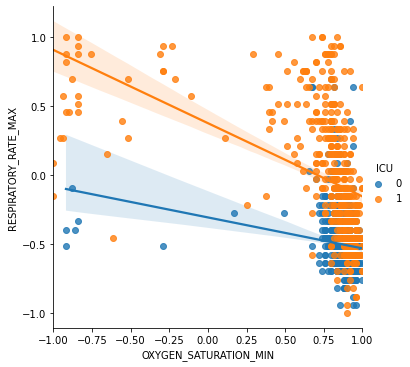

In [24]:
sns.lmplot(x='OXYGEN_SATURATION_MIN', y='RESPIRATORY_RATE_MAX', hue='ICU', data=data);

# Data preparation:

Data cleaning and preparation tasks

In [20]:
#one_hot_data = pd.get_dummies(data, columns=["AGE_PERCENTIL", "WINDOW"], prefix=["AGE_PER", "WINDOW"])
#one_hot_data.head()